<IPython.core.display.Javascript object>


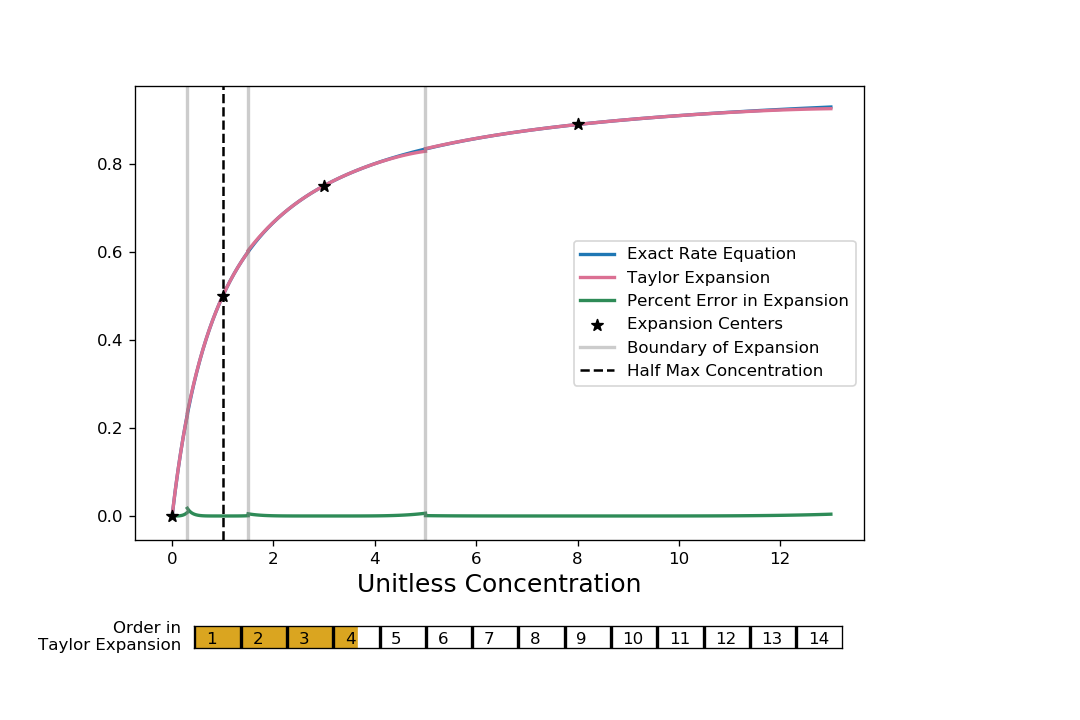

In [199]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg
from matplotlib.widgets import Slider, Button, RadioButtons

def Term(n,x,x0):
    return np.multiply(np.power(np.divide(-1.,1.+x0),n+1.),np.power(x-x0,n))

def Expansion(n,x,x0):
    elements = np.zeros((n,len(x)))
    for i in range(n):
        elements[i] = Term(i+1,x,x0)
    return np.divide(x0,1.+x0) + np.sum(elements, axis = 0)

def Rate(x):
    return np.divide(x,1.+x)

def Error(n,x,x0):
    return np.divide(np.absolute(Rate(x) -Expansion(n,x,x0)),Rate(x))

C = np.linspace(0.01,13,1000)
order1 = 2.3
order = int(order1)
CI1 = np.linspace(1.5,5,100)
CI2 = np.linspace(5,13,100)
CL2 = np.linspace(0.3,1.5,100)
CL1 = np.linspace(0.01,0.3,100)

midpoints = np.array([0,1,3,8])

fig, ax = plt.subplots(figsize = (9,6))
plt.subplots_adjust(bottom=0.25, right=0.8)

fulleq, = plt.plot(C,Rate(C), lw = 2, label = 'Exact Rate Equation',zorder = -1)
halfMax = plt.axvline(x=1, ls = '--', color = 'black', label = 'Half Max Concentration')




fit4, = plt.plot(CI2,Expansion(order,CI2,8), color = 'palevioletred', lw = 2, 
                 label = 'Taylor Expansion',zorder = 0)
fit3, = plt.plot(CI1,Expansion(order,CI1,3), color = 'palevioletred', lw = 2, zorder = 0)
fit2, = plt.plot(CL2,Expansion(order,CL2,1), color = 'palevioletred', lw = 2, zorder = 0)
fit1, = plt.plot(CL1,Expansion(order,CL1,0), color = 'palevioletred', lw = 2,zorder = 0)
E2, = plt.plot(CL2, Error(order,CL2,1), color = 'seagreen', lw = 2, label = 'Percent Error in Expansion',
              zorder = 0)
E4, = plt.plot(CI2, Error(order,CI2,8), color = 'seagreen', lw = 2,zorder = 0)
E3, = plt.plot(CI1, Error(order,CI1,3), color = 'seagreen', lw = 2,zorder = 0)
E1, = plt.plot(CL1, Error(order,CL1,0), color = 'seagreen', lw = 2,zorder = 0)

centers = plt.scatter(midpoints, Rate(midpoints), marker = '*', label = 'Expansion Centers', 
                      color = 'black', zorder = 1, s =50)

threshold = plt.axvline(x=1.5, color = 'grey', lw = 2, alpha = 0.4, label = 'Boundary of Expansion')
plt.axvline(x=5, color = 'grey', lw = 2, alpha = 0.4)
plt.axvline(x=0.3, color = 'grey', lw = 2, alpha = 0.4)

plt.legend(handles = [fulleq,fit4,E2,centers,threshold,halfMax], numpoints = 1, loc = 'best')
plt.xlabel('Unitless Concentration', fontsize = 15)


axthresh = plt.axes([0.18, 0.1, 0.6, 0.03])
sthresh = Slider(axthresh, 'Order in\nTaylor Expansion', 1, 15, valinit=order1, color = 'goldenrod',valfmt="%i")
sthresh.vline.set_color('none')
sthresh.valtext.set_visible(False)


plt.axvline(x=1, color = "black", lw = 2)
plt.axvline(x=2, color = "black", lw = 2)
plt.axvline(x=3, color = "black", lw = 2)
plt.axvline(x=4, color = "black", lw = 2)
plt.axvline(x=5, color = "black", lw = 2)
plt.axvline(x=6, color = "black", lw = 2)
plt.axvline(x=7, color = "black", lw = 2)
plt.axvline(x=8, color = "black", lw = 2)
plt.axvline(x=9, color = "black", lw = 2)
plt.axvline(x=10, color = "black", lw = 2)
plt.axvline(x=11, color = "black", lw = 2)
plt.axvline(x=12, color = "black", lw = 2)
plt.axvline(x=13, color = "black", lw = 2)
plt.axvline(x=14, color = "black", lw = 2)


for i in range(14):
    plt.text(1.25+i,0.2,"{}".format(i+1))

def update(val):
    test = int(sthresh.val)
    fit1.set_ydata(Expansion(test, CL1,0))
    fit2.set_ydata(Expansion(test, CL2,1))
    fit3.set_ydata(Expansion(test, CI1,3))
    fit4.set_ydata(Expansion(test, CI2,8))
    E1.set_ydata(Error(test,CL1,0))
    E2.set_ydata(Error(test,CL2,1))
    E3.set_ydata(Error(test,CI1,3))
    E4.set_ydata(Error(test,CI2,8))
    fig.canvas.draw_idle()
    
def set_slider(s,val):
    s.val = round(val)
    s.poly.xy[2] = s.val,1
    s.poly.xy[3] = s.val,0
    s.valtext.set_text(s.valfmt % s.val)
    
sthresh.on_changed(update)
sthresh.on_changed(set_slider)

plt.ylim(0,1)
plt.show()